# Lending Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from IPython.core.display import HTML
%matplotlib inline
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

In [2]:
#loading loan data 
df = pd.read_csv('loan.csv')

In [3]:
df.shape[0]

39717

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

### Remove column with missing values

In [5]:
col = pd.DataFrame(df.isnull().sum()).reset_index()
col.columns = ['column','null_count']
col['null_perc'] = round((col.null_count/df.shape[0])*100,2)

In [6]:
col[col['null_perc']>10].sort_values(by= 'null_perc')

,column,null_count,null_perc
19,desc,12940,32.58
28,mths_since_last_delinq,25682,64.66
29,mths_since_last_record,36931,92.99
47,next_pymnt_d,38577,97.13
83,mo_sin_rcnt_tl,39717,100.00
84,mort_acc,39717,100.00
85,mths_since_recent_bc,39717,100.00
86,mths_since_recent_bc_dlq,39717,100.00
87,mths_since_recent_inq,39717,100.00
88,mths_since_recent_revol_delinq,39717,100.00


In [7]:
#dropping all columns with more than 30% of data
df.drop(columns=list(col[col['null_perc']>10]['column']) , inplace=True)

In [8]:
col[col['null_perc']>0].sort_values(by= 'null_perc')

,column,null_count,null_perc
48,last_credit_pull_d,2,0.01
21,title,11,0.03
106,tax_liens,39,0.10
33,revol_util,50,0.13
49,collections_12_mths_ex_med,56,0.14
...,...,...,...
109,total_bc_limit,39717,100.00
76,bc_open_to_buy,39717,100.00
77,bc_util,39717,100.00
81,mo_sin_old_rev_tl_op,39717,100.00


In [9]:
df.shape

(39717, 53)

In [10]:
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [11]:
#we can safely remove columns with just 1 unique values as that will be of no use for our analysis
single_value = df.nunique()
df.drop(columns = single_value[single_value.values == 1].index , inplace =True)

In [12]:
df.shape

(39717, 44)

### Variable type distribution

object     19
float64    15
int64      10
dtype: int64

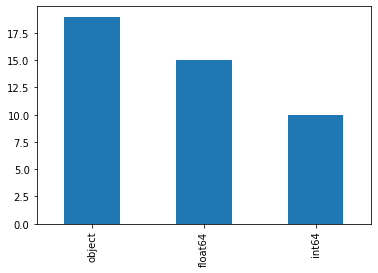

In [13]:
#disttribution of datatypes in dataframe
df.dtypes.value_counts().plot(kind='bar' )
df.dtypes.value_counts()

In [14]:
df.select_dtypes('object').nunique()
df.select_dtypes('int64').nunique()
df.select_dtypes('float64').nunique()

funded_amnt_inv             8205
installment                15383
annual_inc                  5318
dti                         2868
out_prncp                   1137
out_prncp_inv               1138
total_pymnt                37850
total_pymnt_inv            37518
total_rec_prncp             7976
total_rec_int              35148
total_rec_late_fee          1356
recoveries                  4040
collection_recovery_fee     2616
last_pymnt_amnt            34930
pub_rec_bankruptcies           3
dtype: int64

###  categorical variable like emp_title,url,title  are text col and lot of unique values and can be dropped. Similarly id and member_id  these column has unique values, since one can be used as a primary key so anyone can be dropped, so member_id will be dropped. 

In [15]:
#dropping zip code as data is partial only three digits
del_col_1 = ['member_id','emp_title','url','title','zip_code']
df.drop(columns=del_col_1, inplace=True)
df.shape

(39717, 39)

### As we are analysing if a borrower is high risk or not we only need columns to determine how reliable comsumer is we do not need columns that provide info post loan is approved

In [16]:
del_col_2 = ["out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
df.drop(columns=del_col_2, inplace=True)
df.shape

(39717, 27)

In [17]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

### Deleting null rows

In [18]:
# Checking rows with multiple missing values (no rows to be dropped)
df.isnull().sum(axis=1).sort_values(ascending = False)

4714     2
24984    2
11282    2
29984    1
6146     1
        ..
25948    0
25947    0
25946    0
25945    0
0        0
Length: 39717, dtype: int64

In [19]:
#After removing all the unnecessary columns checking the null values for imputation or dropping rows
col = pd.DataFrame(df.isnull().sum()).reset_index()
col.columns = ['column','null_count']
col['null_perc'] = round((col.null_count/df.shape[0])*100,2)
col[col['null_perc']>0].sort_values(by= 'null_perc')


,column,null_count,null_perc
24,revol_util,50,0.13
26,pub_rec_bankruptcies,697,1.75
9,emp_length,1075,2.71


In [20]:
print(df.emp_length.describe())
print(df.emp_length.value_counts())

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


In [21]:
#dropping rows with null values 
#work experience of employee .1033 records are null, this is a small number, ie 2.68% .Adding a mean of all the emp_length would be incorrect.
#Hence dropping rows which have emp_length as null 

#loan1=loan1[~loan1.emp_length.isnull()]

df = df[~df.emp_length.isnull()]


In [22]:
df.pub_rec_bankruptcies.describe()

count    37945.000000
mean         0.041560
std          0.200507
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [23]:
#as majority of value is 0 imputing missing values with 0
df.pub_rec_bankruptcies = df.pub_rec_bankruptcies.fillna(0)

In [24]:
df.revol_util.describe()

count     38595
unique     1087
top          0%
freq        941
Name: revol_util, dtype: object

In [25]:
#revol_util .47 records are null, this is a small number, ie .13% and hence can be dropped

In [26]:
#df = df[~df.revol_util.isnull()]
df=df[~df.revol_util.isnull()]

## Data Modelling
### we see that many columns which are actually int nature are currently obj we will check all columns one by one

In [27]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [28]:
# int and float columns
df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
count,3.859500e+04,38595.000000,38595.000000,38595.000000,38595.000000,3.859500e+04,38595.000000,38595.000000,38595.000000,38595.000000,38595.000000,38595.000000,38595.000000,38595.000000
mean,6.812538e+05,11299.630133,11024.781060,10463.735632,326.965074,6.963713e+04,13.328991,0.146858,0.870139,9.323332,0.053375,13472.994067,22.135924,0.040834
std,2.112748e+05,7461.962656,7192.824781,7139.371351,209.147762,6.424780e+04,6.665582,0.492300,1.070035,4.393713,0.234044,15916.590132,11.389902,0.198823
min,5.473400e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5.136680e+05,5500.000000,5500.000000,5000.000000,168.450000,4.150000e+04,8.210000,0.000000,0.000000,6.000000,0.000000,3761.000000,14.000000,0.000000
50%,6.631030e+05,10000.000000,9975.000000,9000.000000,283.180000,6.000000e+04,13.420000,0.000000,1.000000,9.000000,0.000000,8953.000000,20.000000,0.000000
75%,8.366605e+05,15000.000000,15000.000000,14441.110540,434.750000,8.320000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17161.500000,29.000000,0.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000


In [29]:
# object data type columns
df.select_dtypes('object')

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,revol_util
0,36 months,10.65%,B,B2,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,AZ,Jan-85,83.70%
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,GA,Apr-99,9.40%
2,36 months,15.96%,C,C5,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,IL,Nov-01,98.50%
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,CA,Feb-96,21%
4,60 months,12.69%,B,B5,1 year,RENT,Source Verified,Dec-11,Current,other,OR,Jan-96,53.90%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,36 months,8.07%,A,A4,4 years,MORTGAGE,Not Verified,Jul-07,Fully Paid,home_improvement,CO,Nov-90,13.10%
39713,36 months,10.28%,C,C1,3 years,RENT,Not Verified,Jul-07,Fully Paid,credit_card,NC,Dec-86,26.90%
39714,36 months,8.07%,A,A4,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,Oct-98,19.40%
39715,36 months,7.43%,A,A2,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,other,MD,Nov-88,0.70%


In [30]:
#loan_status
df.loan_status.value_counts()

Fully Paid     32113
Charged Off     5384
Current         1098
Name: loan_status, dtype: int64

In [31]:
#As we will be analysing borrowers on past loans that are completed we will remove loans which are in progress 
#as they can turn into full payemnt or charge off
df = df[~(df['loan_status']=='Current')]
df.shape

(37497, 27)

In [32]:
# Columns int_rate and revol_util are ideally int values so we will remove % and convet type to int

df['int_rate'] = df['int_rate'].apply(lambda x: float(str(x).replace('%','')))
df['revol_util'] = df['revol_util'].apply(lambda x: float(str(x).replace('%','')))

In [33]:
#convert all date columns to proper format issue_d , earliest_cr_line. split columns in month and year
df[['issue_d','earliest_cr_line']].head()


,issue_d,earliest_cr_line
0,Dec-11,Jan-85
1,Dec-11,Apr-99
2,Dec-11,Nov-01
3,Dec-11,Feb-96
5,Dec-11,Nov-04


In [34]:
mon, yr = df['issue_d'].str.split('-').str

In [35]:
yr.value_counts()
# year seems to have no isssues 
mon.value_counts()
# month seems to have no isssues 

Dec    4116
Nov    3887
Oct    3632
Sep    3393
Aug    3317
Jul    3248
Jun    3086
May    2838
Apr    2754
Mar    2624
Jan    2326
Feb    2276
Name: issue_d, dtype: int64

In [36]:
df['issue_yr'] = pd.to_numeric(yr)
df['issue_mon'] = mon
df.drop(columns=['issue_d'], inplace=True)

In [37]:
df['earliest_cr_line'].value_counts()

Oct-99    355
Nov-98    353
Dec-98    332
Oct-00    331
Nov-00    309
         ... 
May-67      1
Jun-72      1
Jan-63      1
Oct-70      1
Aug-67      1
Name: earliest_cr_line, Length: 514, dtype: int64

### Derived Column

In [38]:
mon, yr = df['earliest_cr_line'].str.split('-').str

In [39]:
print(yr.value_counts().sort_values())
# year column is expressed as 2 no and seems to have value from 1900 so need to formatted properly
print(mon.value_counts())
# month seems to have no isssues 

56       1
50       1
54       1
46       1
64       3
62       3
65       6
63       6
66       8
68      14
67      15
69      27
70      37
72      38
71      40
73      47
74      53
75      68
76      77
77      99
78     137
79     141
08     144
80     162
81     165
82     199
83     309
84     370
85     420
86     455
87     576
07     677
88     682
89     801
91     918
90     973
92    1005
06    1115
93    1420
05    1426
04    1698
03    1784
02    1857
94    1906
95    2037
96    2157
97    2331
01    2425
98    2717
99    2845
00    3100
Name: earliest_cr_line, dtype: int64
Oct    3861
Dec    3830
Nov    3725
Sep    3402
Jan    3252
Aug    3132
Jul    2889
Jun    2777
May    2747
Feb    2703
Mar    2609
Apr    2570
Name: earliest_cr_line, dtype: int64


In [40]:
from datetime import datetime
today = datetime.today()
print(today)

2022-04-05 00:00:45.473248


In [41]:
#function to cal no of days from earliest credit line
def days_from_ecl (d):
    m, y = d.split('-')
    y = 2000 + int(y)
    if y > today.year:
        y -= 100
    earliest_cr_line = datetime.strptime(str(y)+'-'+m+'-1', '%Y-%b-%d')
    return (today - earliest_cr_line).days

In [42]:
df['days_from_earliest_cr_line'] = df['earliest_cr_line'].apply(days_from_ecl)
df['days_from_earliest_cr_line'].describe()

count    37497.000000
mean      9143.694322
std       2424.054254
min       4903.000000
25%       7521.000000
50%       8709.000000
75%      10321.000000
max      27853.000000
Name: days_from_earliest_cr_line, dtype: float64

In [43]:
df.drop(columns=['earliest_cr_line'], inplace=True)

## Univariate analysis

### Categorical variables

In [44]:
df.select_dtypes('object')

,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,addr_state,issue_mon
0,36 months,B,B2,10+ years,RENT,Verified,Fully Paid,credit_card,AZ,Dec
1,60 months,C,C4,< 1 year,RENT,Source Verified,Charged Off,car,GA,Dec
2,36 months,C,C5,10+ years,RENT,Not Verified,Fully Paid,small_business,IL,Dec
3,36 months,C,C1,10+ years,RENT,Source Verified,Fully Paid,other,CA,Dec
5,36 months,A,A4,3 years,RENT,Source Verified,Fully Paid,wedding,AZ,Dec
...,...,...,...,...,...,...,...,...,...,...
39712,36 months,A,A4,4 years,MORTGAGE,Not Verified,Fully Paid,home_improvement,CO,Jul
39713,36 months,C,C1,3 years,RENT,Not Verified,Fully Paid,credit_card,NC,Jul
39714,36 months,A,A4,< 1 year,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,MA,Jul
39715,36 months,A,A2,< 1 year,MORTGAGE,Not Verified,Fully Paid,other,MD,Jul


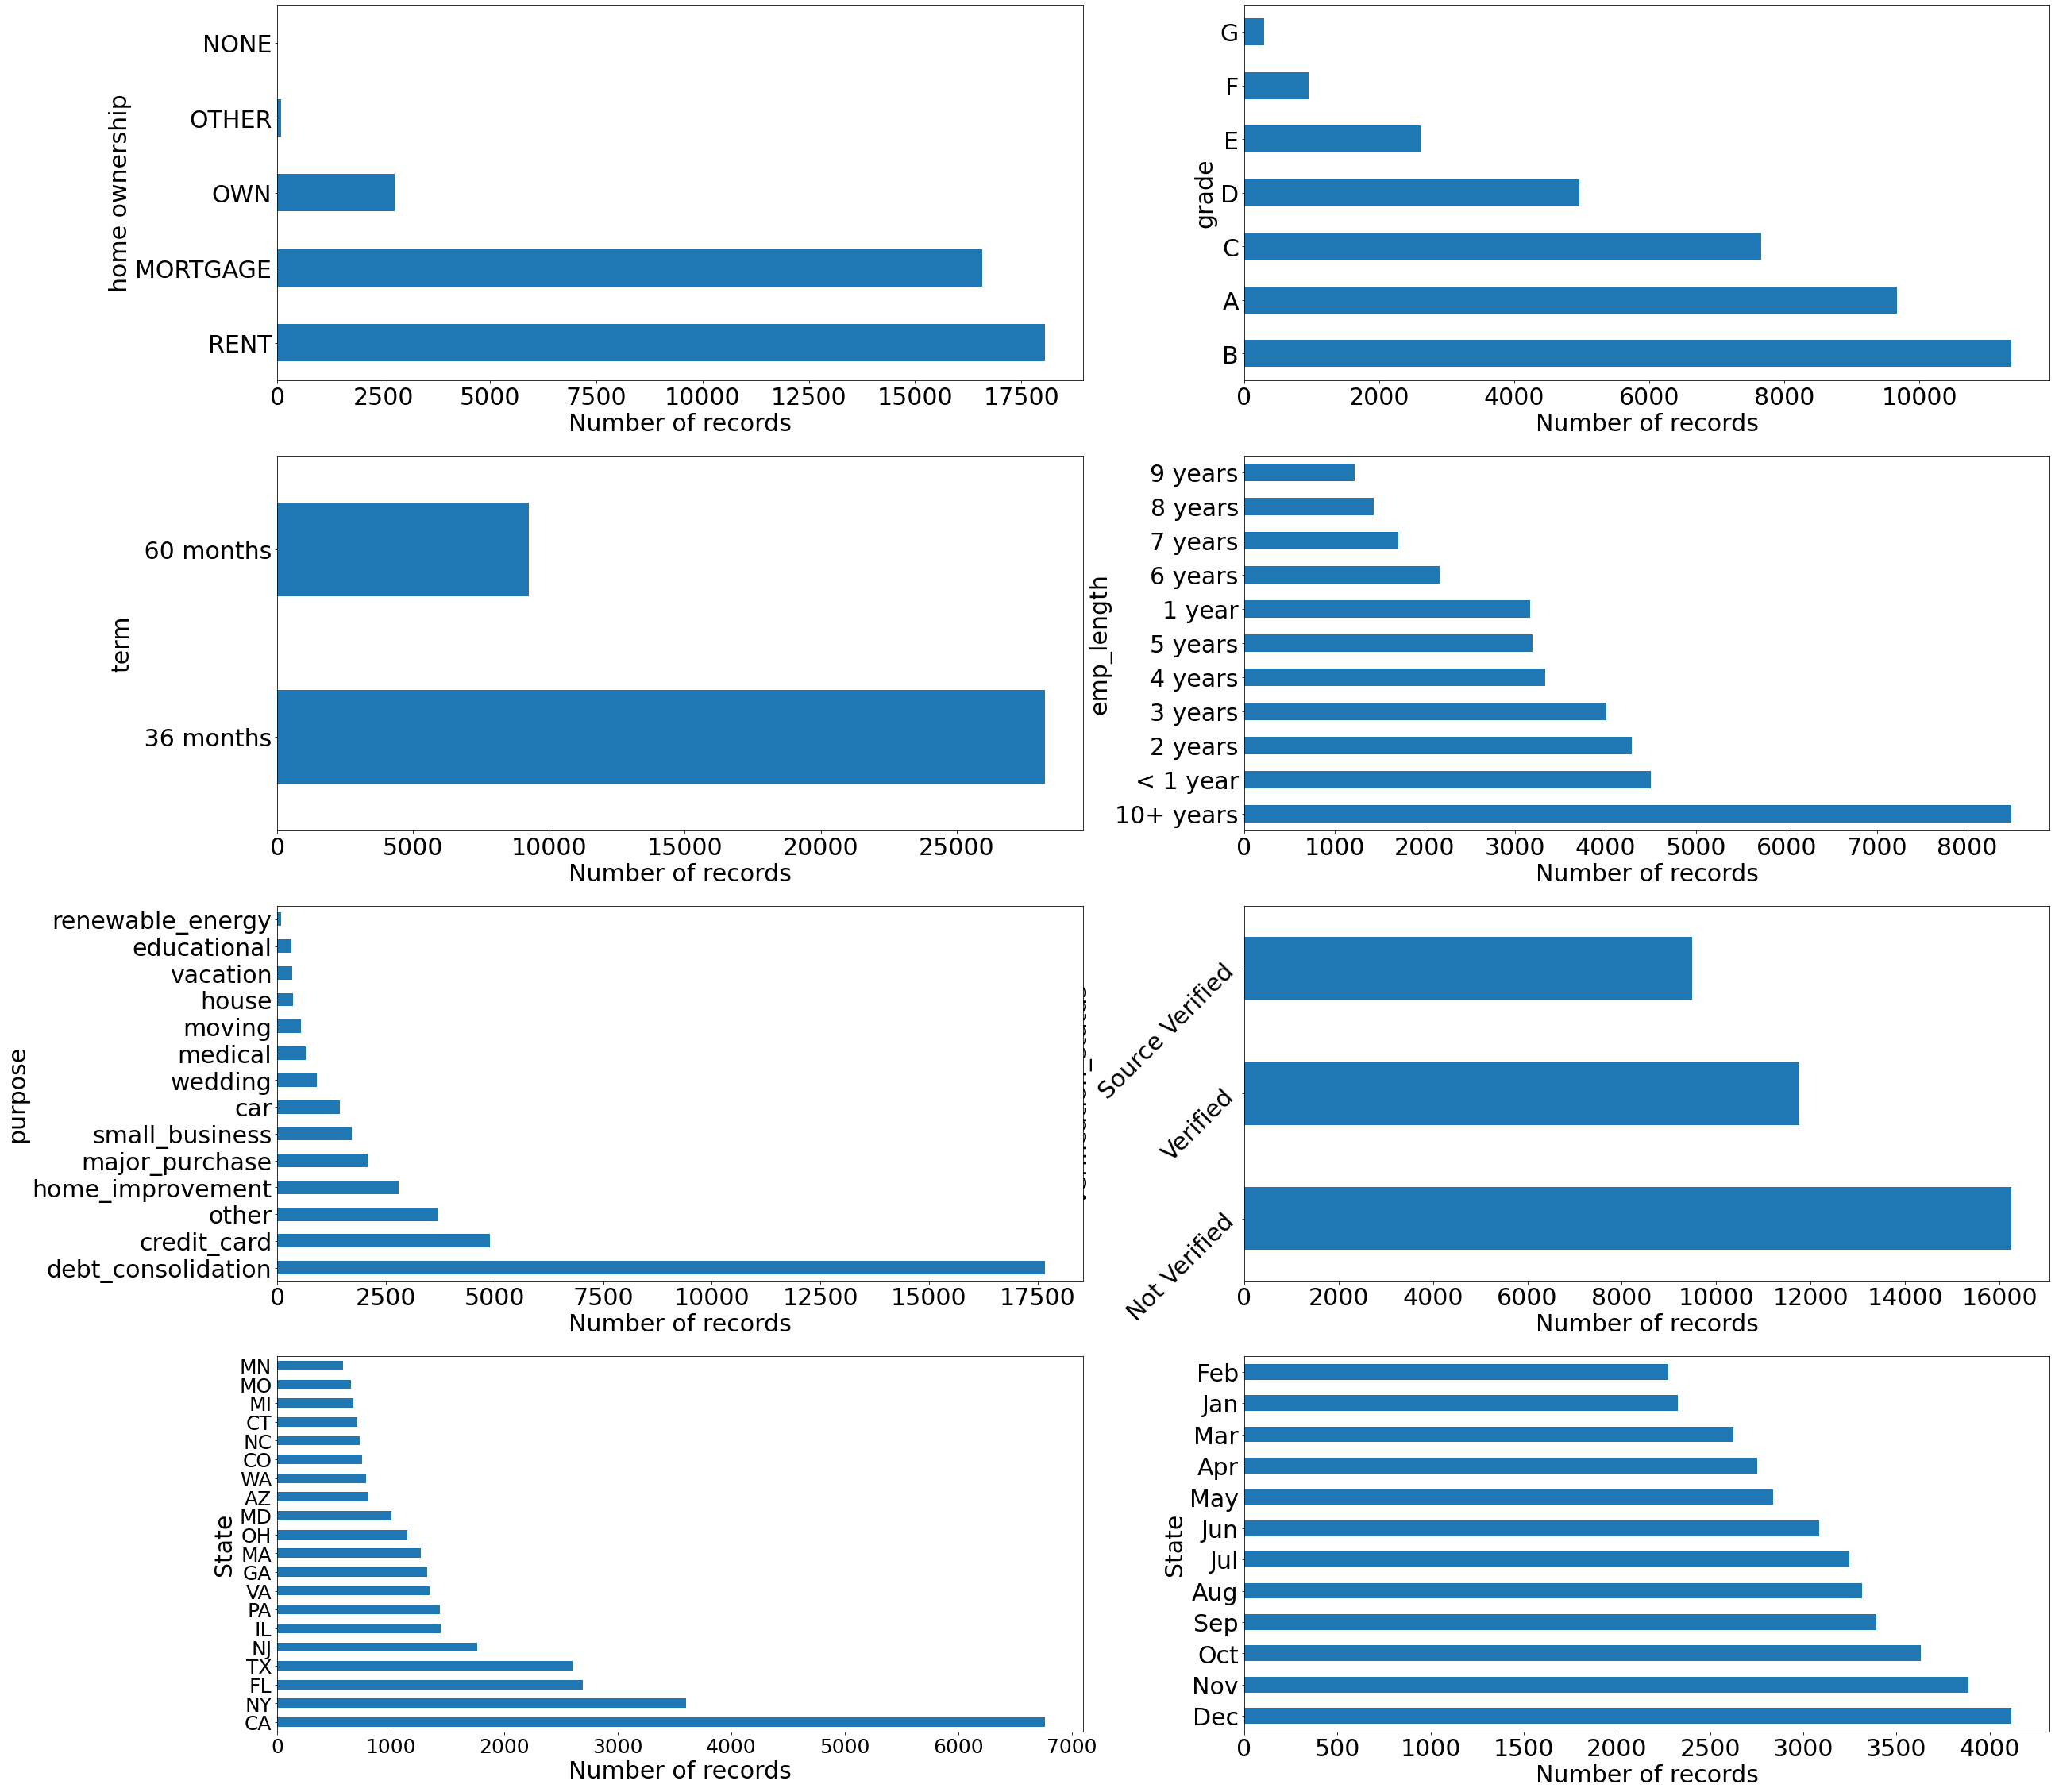

In [45]:
#distribution of all categorical variables

plt.figure(figsize=(40,40))

plt.subplot(4, 2, 1)
df.home_ownership.value_counts().plot(kind='barh', fontsize=30)
plt.xlabel('Number of records',fontsize=30)
plt.ylabel('home ownership',fontsize=30)

plt.subplot(4, 2, 2)
df.grade.value_counts().plot(kind='barh', fontsize=30)
plt.xlabel('Number of records',fontsize=30)
plt.ylabel('grade',fontsize=30)

plt.subplot(4, 2, 3)
df.term.value_counts().plot(kind='barh', fontsize=30)
plt.xlabel('Number of records',fontsize=30)
plt.ylabel('term',fontsize=30)

plt.subplot(4, 2, 4)
df.emp_length.value_counts().plot(kind='barh', fontsize=30)
plt.xlabel('Number of records',fontsize=30)
plt.ylabel('emp_length',fontsize=30)

plt.subplot(4, 2, 6)
df.verification_status.value_counts().plot(kind='barh', fontsize=30 , rot=45)
plt.xlabel('Number of records',fontsize=30)
plt.ylabel('verification_status',fontsize=30)

plt.subplot(4, 2, 5)
df.purpose.value_counts().plot(kind='barh', fontsize=30)
plt.xlabel('Number of records',fontsize=30)
plt.ylabel('purpose',fontsize=30)

plt.subplot(4, 2, 7)
df.addr_state.value_counts().head(20).plot(kind='barh', fontsize=25)
plt.xlabel('Number of records',fontsize=30)
plt.ylabel('State',fontsize=30)

plt.subplot(4, 2, 8)
df.issue_mon.value_counts().plot(kind='barh', fontsize=30)
plt.xlabel('Number of records',fontsize=30)
plt.ylabel('State',fontsize=30)


plt.show()

### Continuous variables

In [46]:
df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_yr,days_from_earliest_cr_line
count,3.749700e+04,37497.000000,37497.000000,37497.000000,37497.000000,37497.000000,3.749700e+04,37497.000000,37497.000000,37497.000000,37497.000000,37497.000000,37497.000000,37497.000000,37497.000000,37497.000000,37497.000000,37497.000000
mean,6.745115e+05,11127.362856,10861.260234,10288.801951,11.958772,324.858107,6.943653e+04,13.288131,0.147078,0.872390,9.304264,0.053738,13379.139958,48.861742,22.098035,0.041043,10.299517,9143.694322
std,2.098207e+05,7353.972102,7096.151309,7033.947315,3.682062,208.906836,6.467208e+04,6.659208,0.493230,1.071211,4.394866,0.234659,15896.953395,28.341493,11.413448,0.199064,0.888599,2424.054254
min,5.473400e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,7.000000,4903.000000
25%,5.093440e+05,5500.000000,5400.000000,5000.000000,8.940000,167.530000,4.100000e+04,8.160000,0.000000,0.000000,6.000000,0.000000,3711.000000,25.400000,13.000000,0.000000,10.000000,7521.000000
50%,6.538520e+05,10000.000000,9600.000000,8875.000000,11.830000,280.260000,6.000000e+04,13.390000,0.000000,1.000000,9.000000,0.000000,8856.000000,49.300000,20.000000,0.000000,11.000000,8709.000000
75%,8.270490e+05,15000.000000,15000.000000,14100.000000,14.420000,429.350000,8.300000e+04,18.550000,0.000000,1.000000,12.000000,0.000000,17017.000000,72.400000,29.000000,0.000000,11.000000,10321.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,2.000000,11.000000,27853.000000


In [47]:
# create loan status flag 1 for defaulted loans and 0 for paid off ones
df['loan_status_flag'] = df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

<Figure size 720x720 with 0 Axes>

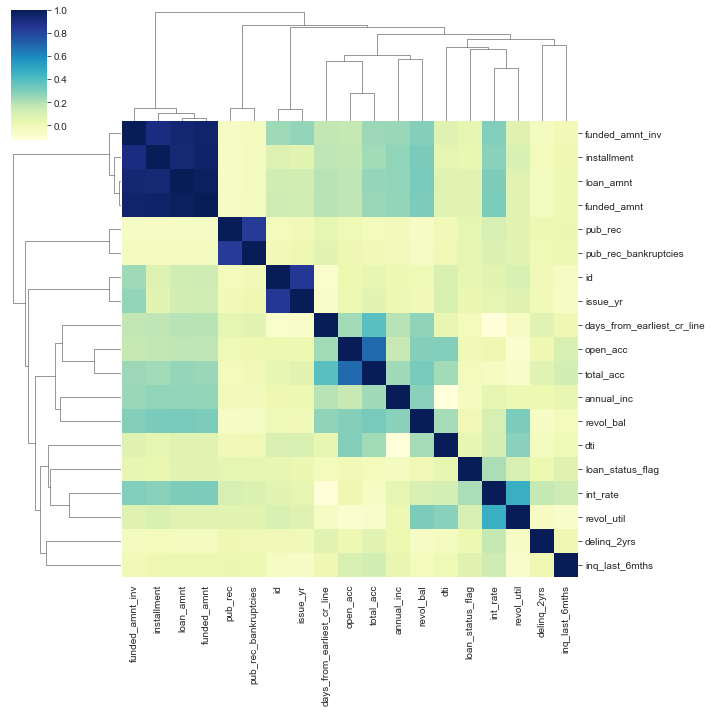

In [48]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.clustermap(data=df.corr(), cmap='YlGnBu')
plt.show()

    We see that few columns are highly co-rrelated
    1- pub_rec and pub_rec_bankyrupticies
    2- installment,loan_amt, funded_amt, funded_amt_inv
    3- Open_acc and total_acc

### Univariate for continuous variable and outlier removal



### loan_amnt

<AxesSubplot:xlabel='loan_amnt'>

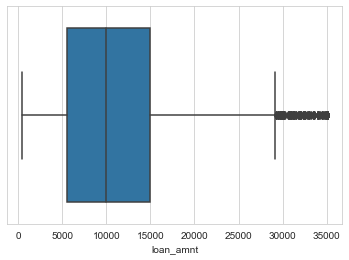

In [49]:
sns.boxplot(df['loan_amnt'])

In [50]:
print(df['loan_amnt'].describe())
print(df.loan_amnt.quantile([0.75,.80,.85,0.90,0.95]))

count    37497.000000
mean     11127.362856
std       7353.972102
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
0.75    15000.0
0.80    16000.0
0.85    20000.0
0.90    21850.0
0.95    25000.0
Name: loan_amnt, dtype: float64


In [51]:
df_copy = df

In [52]:
df = df.loc[(df['loan_amnt']<=20000)]

### annual_inc

<AxesSubplot:xlabel='annual_inc'>

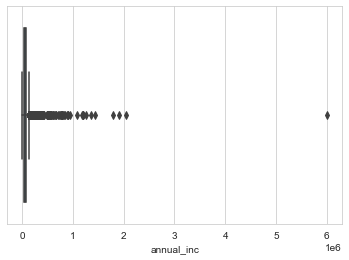

In [53]:
sns.boxplot(df['annual_inc'])

In [54]:
print(df['annual_inc'].describe())
print(df.annual_inc.quantile([0.75,.80,.85,0.90,0.95 ]))

count    3.328700e+04
mean     6.453615e+04
std      5.885712e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.500000e+04
75%      7.700000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
0.75     77000.0
0.80     84996.0
0.85     94000.0
0.90    105505.6
0.95    129000.0
Name: annual_inc, dtype: float64


In [55]:
from matplotlib.cbook import boxplot_stats  
boxplot_stats(df.annual_inc).pop(0)['fliers'].min()

132540.0

In [56]:
df = df.loc[(df['annual_inc']<=121680.0)]

### int_rate

21.67

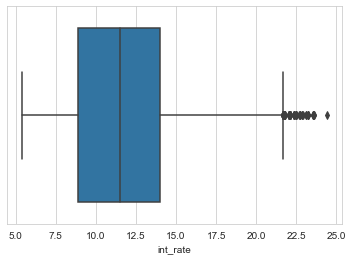

In [57]:
sns.boxplot(df['int_rate'])
from matplotlib.cbook import boxplot_stats  
boxplot_stats(df.int_rate).pop(0)['fliers'].min()

In [58]:
df = df.loc[(df['int_rate']<=21.67)]

### installment

675.68

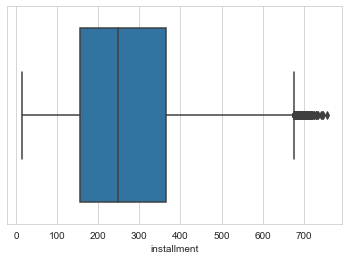

In [59]:
sns.boxplot(df['installment'])
from matplotlib.cbook import boxplot_stats  
boxplot_stats(df.installment).pop(0)['fliers'].min()

In [60]:
df = df.loc[(df['installment']<=654.94)]

### dti

<AxesSubplot:xlabel='dti'>

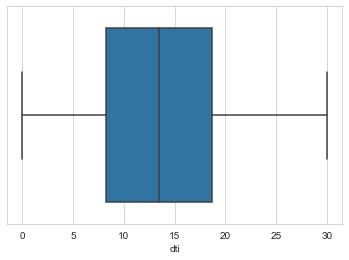

In [61]:
sns.boxplot(df['dti'])


### revol_bal

30780

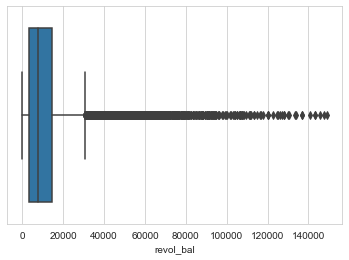

In [62]:
sns.boxplot(df['revol_bal'])
from matplotlib.cbook import boxplot_stats  
boxplot_stats(df.revol_bal).pop(0)['fliers'].min()

In [63]:
df = df.loc[(df['revol_bal']<=27801)]

### revol_util

<AxesSubplot:xlabel='revol_util'>

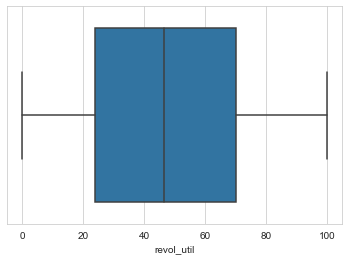

In [64]:
sns.boxplot(df['revol_util'])

<AxesSubplot:xlabel='loan_status', ylabel='open_acc'>

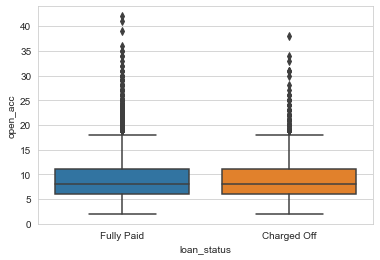

In [65]:
sns.boxplot(x = 'loan_status', y = 'open_acc', data = df)

<AxesSubplot:xlabel='loan_status', ylabel='total_acc'>

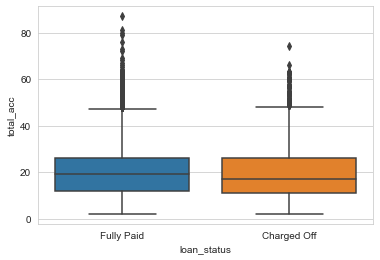

In [66]:
sns.boxplot(x = 'loan_status', y = 'total_acc', data = df)


## Segmented Univariate


## Segmented Univariate Continuous 

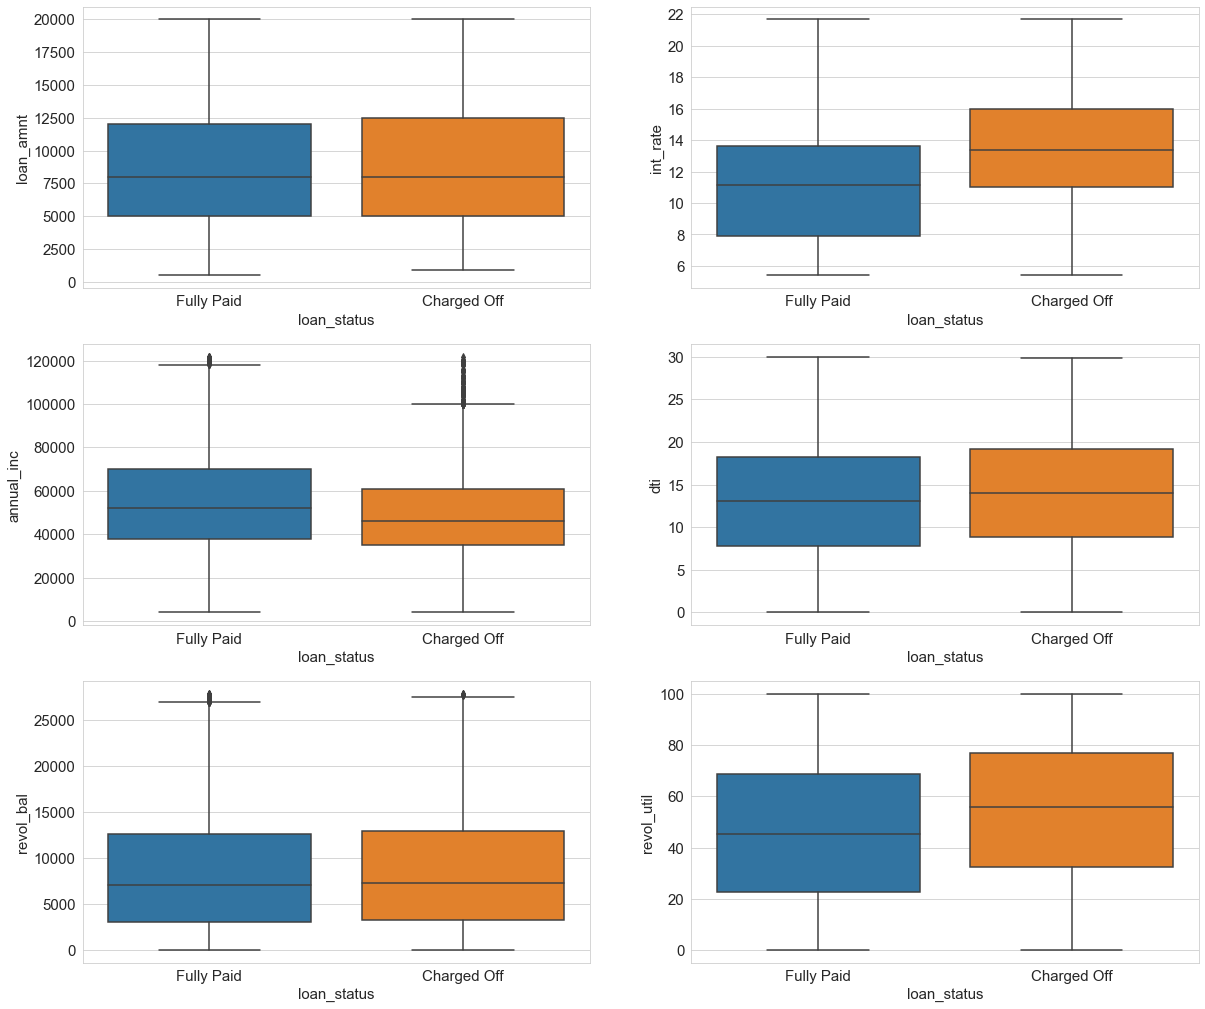

In [67]:
plt.figure(figsize=(20, 30))

plt.subplot(5,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df )
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('loan_status',fontsize=15)
plt.ylabel('loan_amnt',fontsize=15)


plt.subplot(5,2,2)
sns.boxplot(x = 'loan_status', y = 'int_rate', data = df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('loan_status',fontsize=15)
plt.ylabel('int_rate',fontsize=15)

plt.subplot(5,2,3)
sns.boxplot(x = 'loan_status', y = 'annual_inc', data = df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('loan_status',fontsize=15)
plt.ylabel('annual_inc',fontsize=15)

plt.subplot(5,2,4)
sns.boxplot(x = 'loan_status', y = 'dti', data = df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('loan_status',fontsize=15)
plt.ylabel('dti',fontsize=15)

plt.subplot(5,2,5)
sns.boxplot(x = 'loan_status', y = 'revol_bal', data = df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('loan_status',fontsize=15)
plt.ylabel('revol_bal',fontsize=15)

plt.subplot(5,2,6)
sns.boxplot(x = 'loan_status', y = 'revol_util', data = df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('loan_status',fontsize=15)
plt.ylabel('revol_util',fontsize=15)


plt.show()

Summary of box plots:

1.from box plot we can see higher loam amount tends to higher chances of defaulter. 
there is difference in 75percentile for both category

2.from box plot we can see higher interest rate tends to higher chances of default. 
there is huge difference in for both category

3.from box plot we can see higher annual_inc tends to lower chances of default. 
there is huge difference in 75percentile for both category

4.from box plot we can see higher dti value tends to higher chances of default. 
there is difference in 75percentile for both category

5.from box plot we can see there is slight difference in 75percentile for both category not conclusive.

6.from box plot we can see higher revol_util rate tends to higher chances of default. 
there is huge difference in for both category

Note- for univariate segmented analysis we have created same plot for diff columns multiple time so we will create a function to plot map goiing forward

Text(0, 0.5, 'days_from_earliest_cr_line')

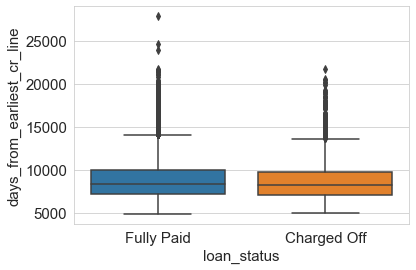

In [68]:

sns.boxplot(x = 'loan_status', y = 'days_from_earliest_cr_line', data = df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('loan_status',fontsize=15)
plt.ylabel('days_from_earliest_cr_line',fontsize=15)


In [69]:
days_ecr = df[ df['days_from_earliest_cr_line'] < 10000]

Text(0, 0.5, 'days_from_earliest_cr_line')

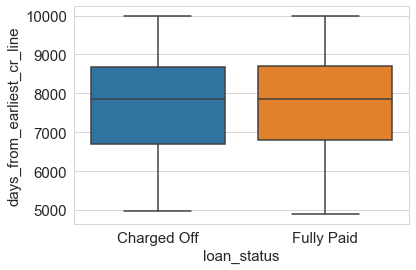

In [70]:

sns.boxplot(x = 'loan_status', y = 'days_from_earliest_cr_line', data = days_ecr)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('loan_status',fontsize=15)
plt.ylabel('days_from_earliest_cr_line',fontsize=15)

Observation: There is no conclusive difference as seen in graph above

## Segmented Univariate Categorical 

In [71]:
def Univariate_Seg_bar (*, data=df, column):
    ax = sns.countplot(data=data, x=column, hue=data.loan_status, order=data[column].value_counts().index)
    # add annotations
    for c in ax.containers:

        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{h/df.loan_status.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge')
    plt.xticks(fontsize=15,rotation=45)
    plt.yticks(fontsize=15)
    plt.ylabel('Count of records',fontsize=15)
    plt.xlabel(column,fontsize=15)

    plt.show()

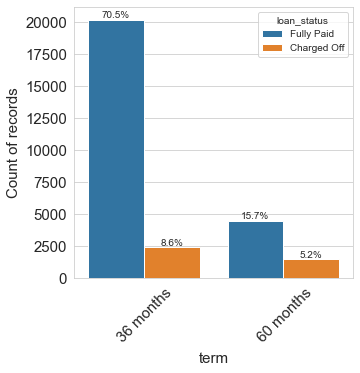

In [74]:
#Term
plt.figure(figsize=(5, 5))
Univariate_Seg_bar(column='term')

Observation:
For loans with 5 year repayment term, the default percent is arond 33% (5.2/15.7). And for 3 year loan repayment term, the default is only around 12% of the cases. Therefore, loan repayment term plays a important factor in predicting the default rate.

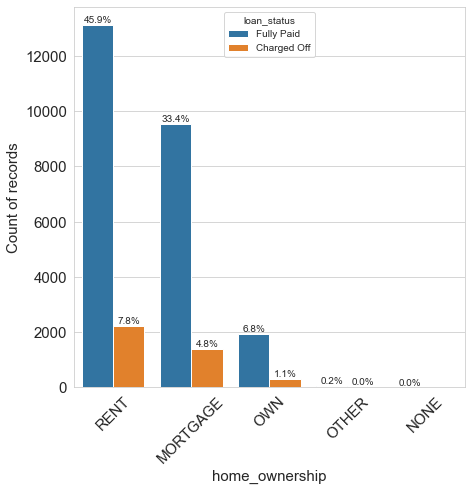

In [75]:
#home_ownership
plt.figure(figsize=(7, 7))
Univariate_Seg_bar(column='home_ownership')

Observation: 
The ratios of charged off per category are RENT 17% Mortagage 14% and OWN 16%. 
We do not have significant difference to conclude impact of home ownership on loan

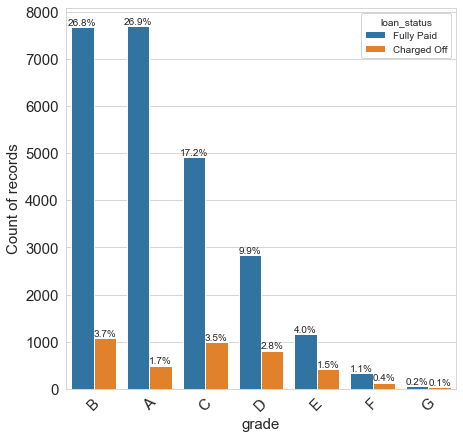

In [76]:
#grade
plt.figure(figsize=(7, 7))
Univariate_Seg_bar(column='grade')

Observation: 
The ratios of charged off per category are B-13% A-6% C-20% D-28% E-37% F- 37% , G-50%
We can clearly see that loan grades having highest default percentages. G, F, E and D form grades 
where default rate is much higher than others. In graph we can see the lower grade have high proportion
of charged off account

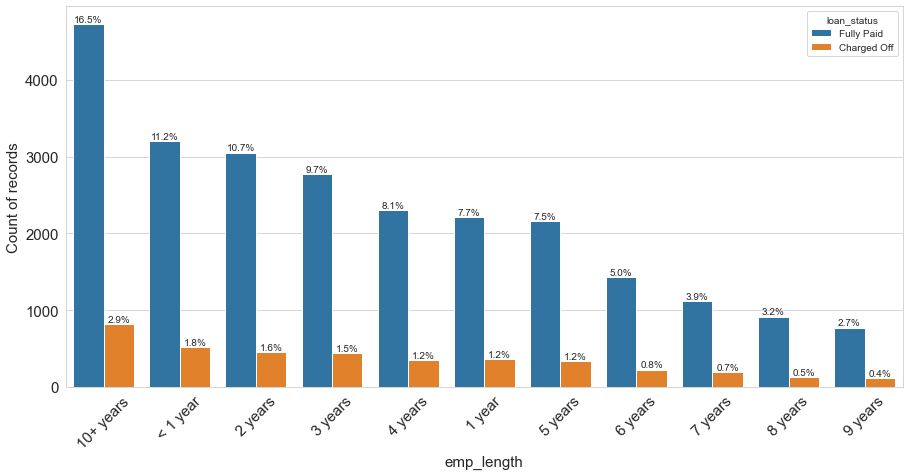

In [77]:
#emp_length
plt.figure(figsize=(15, 7))
Univariate_Seg_bar(column='emp_length')

Observation: 
The ratios of charged off per category are in similar range.
We do not have significant difference to conclude impact of home ownership on loan

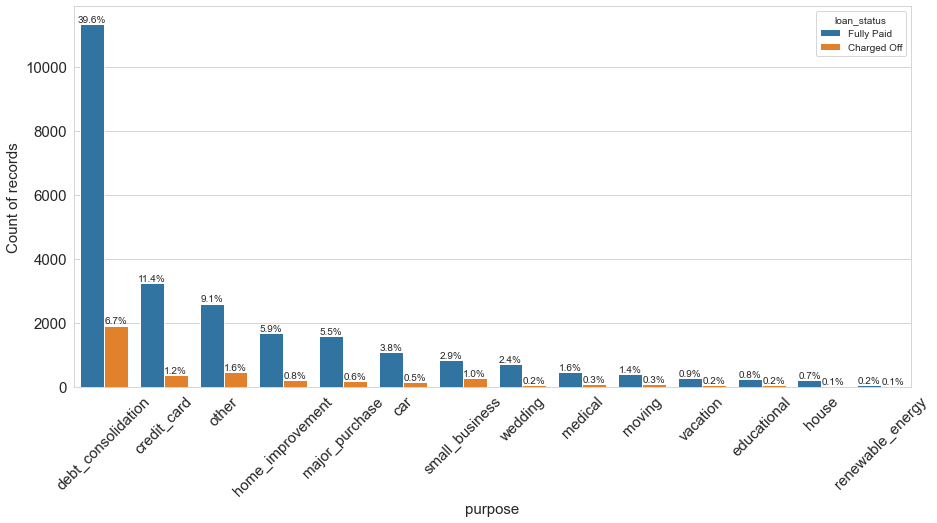

In [78]:
#purpose
plt.figure(figsize=(15, 7))
Univariate_Seg_bar(column='purpose')


Observation: 
The ratios of charged off per category are high for small business ~34% , .edution around 25%, vacation and renewable energy
Other purpose have somewhat similar range. 
From the above analysis it is evidend that the loans taken for small_business, renewable_energy ,vacation, educational are the riskier ones.

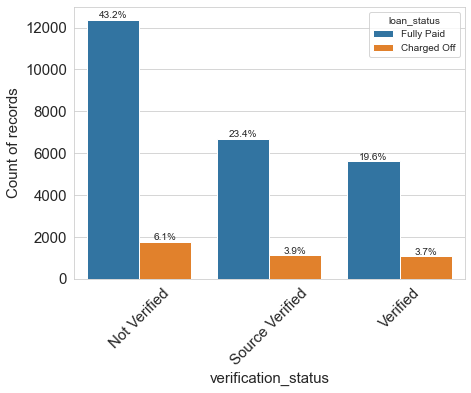

In [79]:
#verification_status
plt.figure(figsize=(7, 5))
Univariate_Seg_bar(column='verification_status')


Observation: 
The ratios of charged off per category are Not verified -14% Source Verified - 16% and Verified - 19%
Surprisingly the trend is unexpected verified applicants have more defaulted % which means the verifiaction process has some issue.

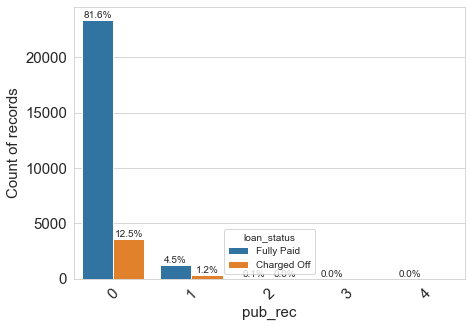

In [80]:
#pub_rec
plt.figure(figsize=(7, 5))
Univariate_Seg_bar(column='pub_rec')


Observation: 
The ratios of charged off per category are 0-15% , 1 - 26%
graph crealy shows that individuals with  derogatory public records have higher chances of charged off

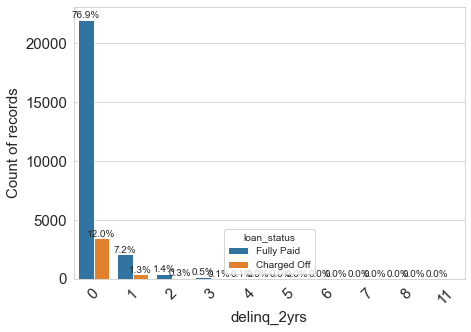

In [81]:
#delinq_2yrs
plt.figure(figsize=(7, 5))
Univariate_Seg_bar(column='delinq_2yrs')

Observation: The ratios of charged off % per category % is less for 0 deliquent year around 15% and high 
for >0 values 18% 21% and so on


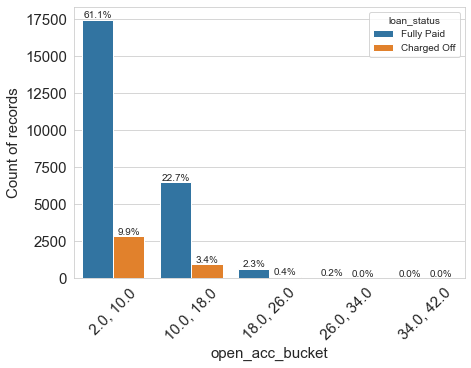

In [85]:
df['open_acc_bucket'] =pd.cut(df['open_acc'], bins=5,precision =0, labels =['2.0, 10.0','10.0, 18.0','18.0, 26.0','26.0, 34.0','34.0, 42.0'])
plt.figure(figsize=(7, 5))
Univariate_Seg_bar(column='open_acc_bucket')                            

Observation: The ratios of charged off % per category are in similar ranges. No conclusive evidence of impact of open account

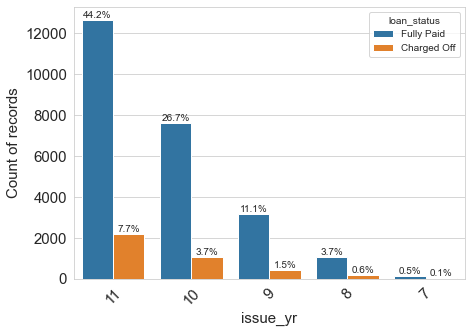

In [86]:
#issue_yr
plt.figure(figsize=(7, 5))
Univariate_Seg_bar(column='issue_yr')       

Observation: Charge of % rate was higher in year 2007 and 2011 as seen in graph. But we no conclusion can be drawn

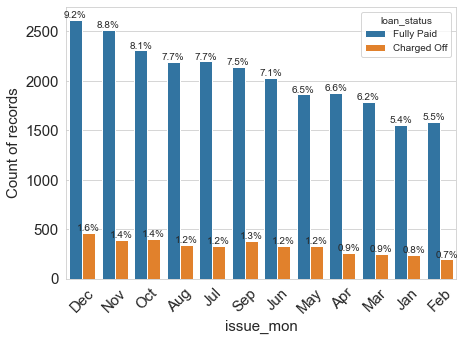

In [87]:
#issue_mon
plt.figure(figsize=(7, 5))
Univariate_Seg_bar(column='issue_mon')     

Observation: From graph we can infer that Charge of % rate was higher in month of Dee and May around 18% where as for other months its in range of 15-12%. Dec also sees high no of loan application may be because of holiday season people apply for loan for holiday and vacation. Also previously we have observed that vaacation purpose had high charge off value which supports our theory

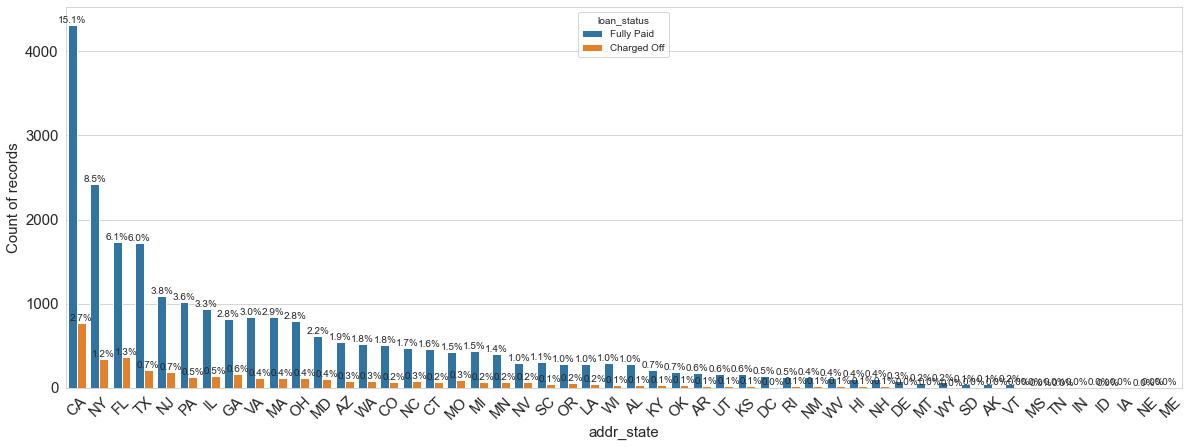

In [88]:
#addr_state
plt.figure(figsize=(20, 7))
Univariate_Seg_bar(column='addr_state')     

Observation: From graph we see a lot of application in CA but we can not infer which state have high charge off % due to huge data

In [89]:
x=df.groupby(df.addr_state).loan_status.value_counts(normalize=True).rename('Charged off %').reset_index().sort_values('addr_state')
x[x['loan_status'] == 'Charged Off'].sort_values(by = 'Charged off %', ascending = False).head(10)

,addr_state,loan_status,Charged off %
53,NE,Charged Off,0.750000
26,ID,Charged Off,0.200000
23,HI,Charged Off,0.198413
62,NV,Charged Off,0.196676
78,SD,Charged Off,0.183673
19,FL,Charged Off,0.172775
46,MO,Charged Off,0.168605
21,GA,Charged Off,0.162384
60,NM,Charged Off,0.160000
68,OK,Charged Off,0.158590


From the above table we can see that the some of the risky states are NE, NV, SD, ID, FL , HI


In [90]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'issue_yr', 'issue_mon',
       'days_from_earliest_cr_line', 'loan_status_flag', 'open_acc_bucket'],
      dtype='object')

## Bivariate Analysis

####  Functions for graph - For Boxplot with Bar plot



In [91]:
def box_bar_plot_bivariate(x_axis, y_axis, hue, dataset, order=None):

    plt.figure(figsize=(20,5))

    plt.subplot(121)

    sns.boxplot(x=x_axis, y=y_axis, hue=hue, data=dataset, order = order)

    plt.title(f'{x_axis.swapcase()} vs {y_axis.swapcase()}')

    plt.subplot(122)

    sns.barplot(x=x_axis, y=y_axis, hue=hue, data=dataset, estimator=np.median, order = order)

    plt.title(f'{x_axis.swapcase()} vs {y_axis.swapcase()}')

    plt.show()

### Term Vs Important variables

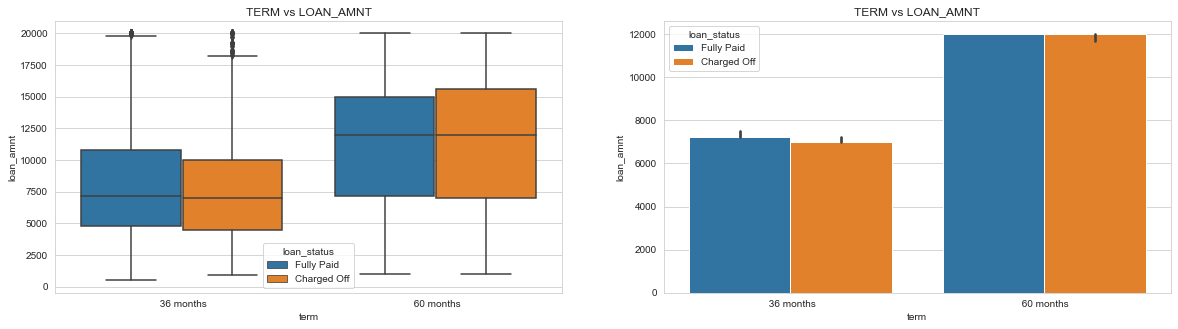

In [92]:
#Term vs Loan Amount
box_bar_plot_bivariate('term', 'loan_amnt', 'loan_status', df)

Observations: Loan amount is not a decider for defaults in both 36 and 60 months.
Borrowers have equal distribtion in both default and non default for 36 and 60 months.


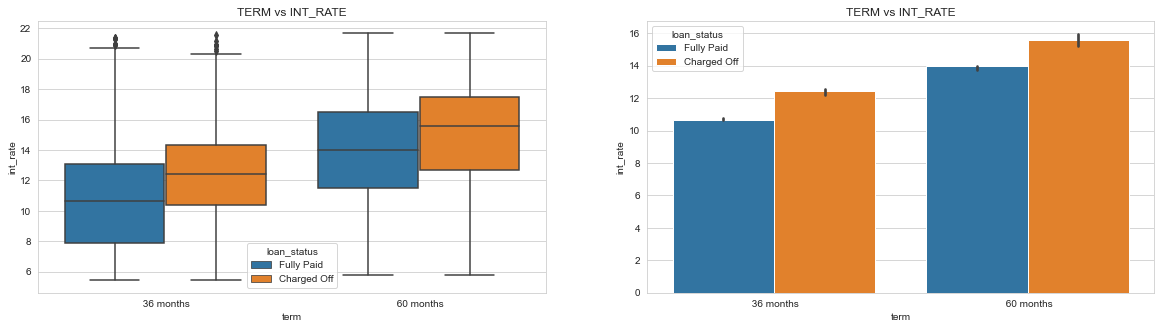

In [93]:
#Term vs Interest Rate
box_bar_plot_bivariate('term', 'int_rate', 'loan_status', df)

Observations
For higher interest rates the default rate is higher in both 36 and 60 months tenure.


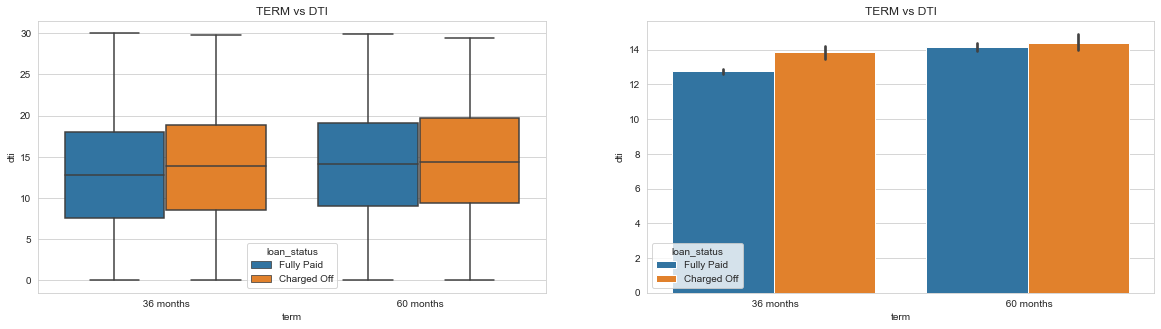

In [94]:
#Term vs DTI
box_bar_plot_bivariate('term', 'dti', 'loan_status', df)

Observations:
Comparitively charge-off are higher when compared with fully-paid for the Debit to income ratio.

### Grade

In [95]:
#Sorting Grades
grade_ord = df.grade.unique()
grade_ord.sort()

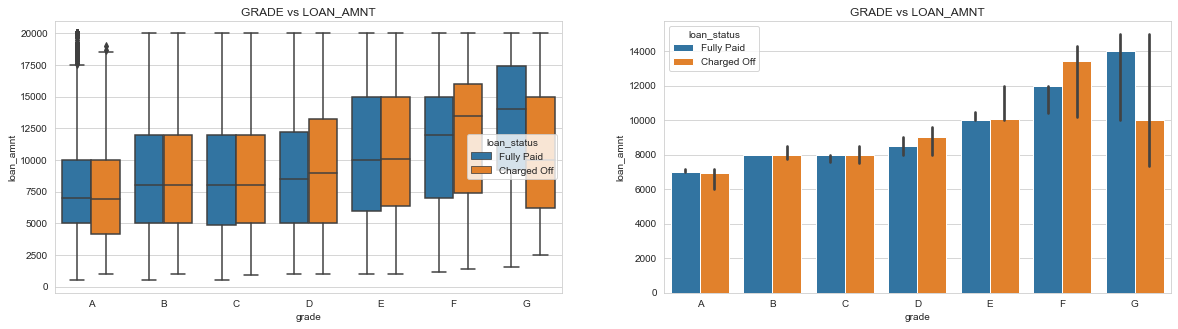

In [96]:
#Grade vs Loan Amount
box_bar_plot_bivariate('grade', 'loan_amnt', 'loan_status', df, grade_ord)

Observations:

    Lower grades 'F' and 'G' are having more difference between charged-off and fully paid.
    Lower grade people take higher amount of loans and are more prone to default the loan.


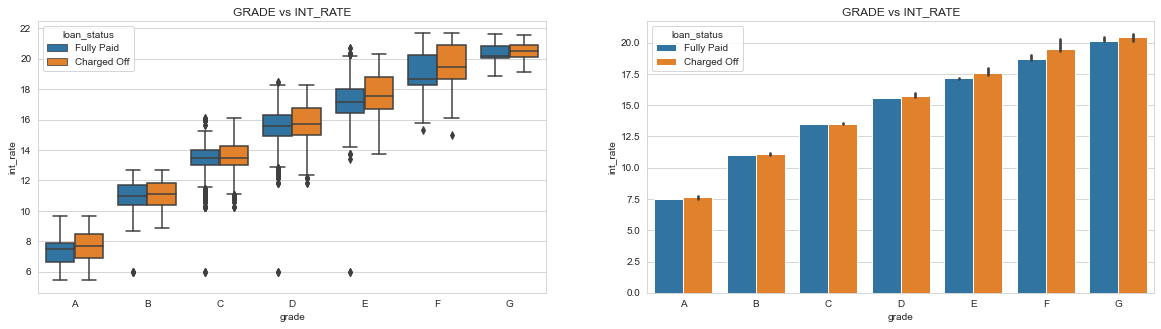

In [97]:
#Grade vs Initial Rate
box_bar_plot_bivariate('grade', 'int_rate', 'loan_status', df, grade_ord)

Observations:
As grade is decreasing, interest rate gradually increases and they are more prone to default the loan.

### Emp Length

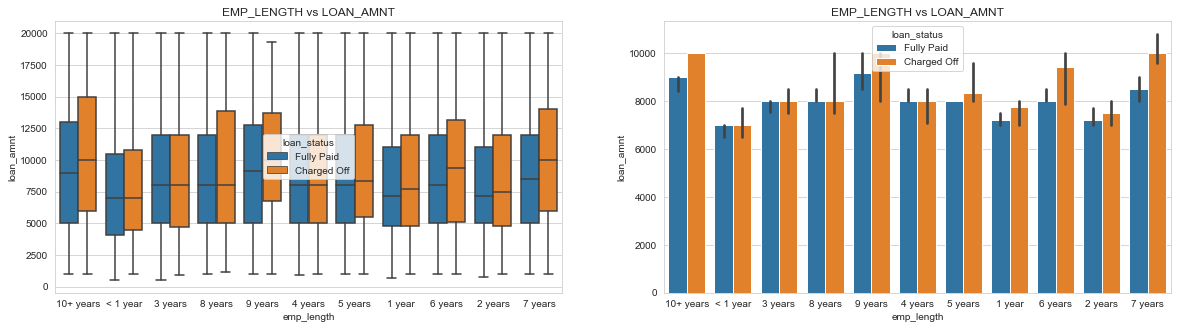

In [98]:
#Emp Length vs Loan Amount
box_bar_plot_bivariate('emp_length', 'loan_amnt', 'loan_status', df)

Observations:
Borrowers with higher employment lengths and took more loan amounts got more default rate.


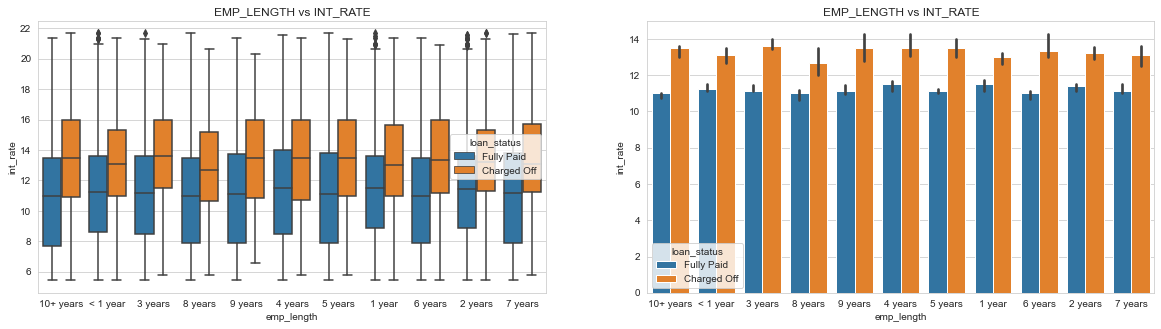

In [99]:
#Emp Length vs Loan Amount
box_bar_plot_bivariate('emp_length', 'int_rate', 'loan_status', df)

Observations: Irrespictive of employment length loans with more interest rates got defaulted more

### Purpose

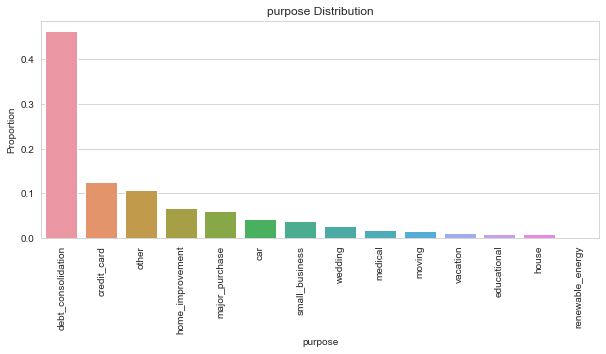

In [100]:
#Probability of each values
plt.figure(figsize=(10,4))
purpose = 'purpose'
prob_df = df[purpose].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=purpose, data=prob_df)
plt.xlabel(purpose)
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title(purpose+' Distribution')
plt.show()

Observations: debt_consolidation has highest proportion


<Figure size 432x288 with 0 Axes>

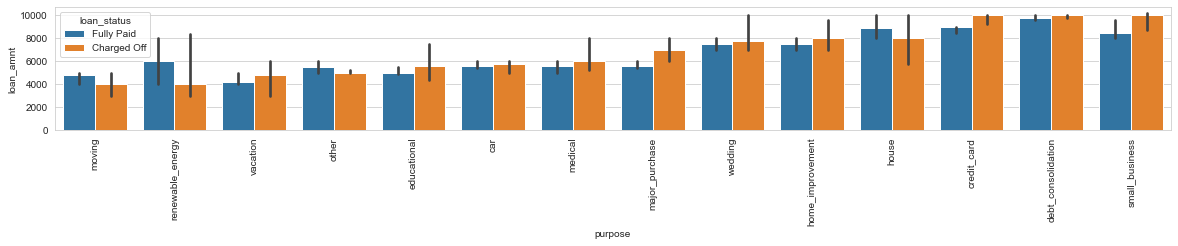

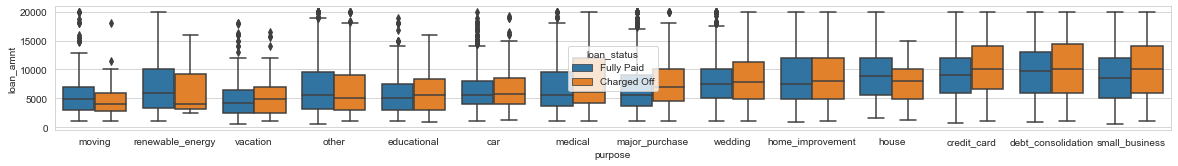

In [101]:
#Purpose vs Loan Amount
df_purpose_loan_amount = df.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= df, order=df_purpose_loan_amount[df_purpose_loan_amount.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= df, order=df_purpose_loan_amount[df_purpose_loan_amount.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()

Observations: Small Business has highest chances of getting defaulters if loan amount is higher


<Figure size 432x288 with 0 Axes>

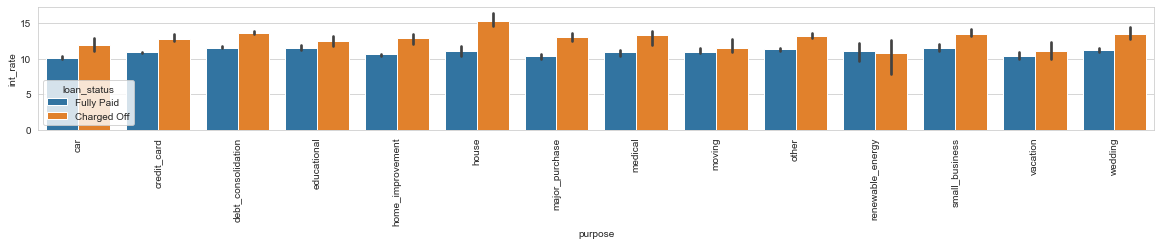

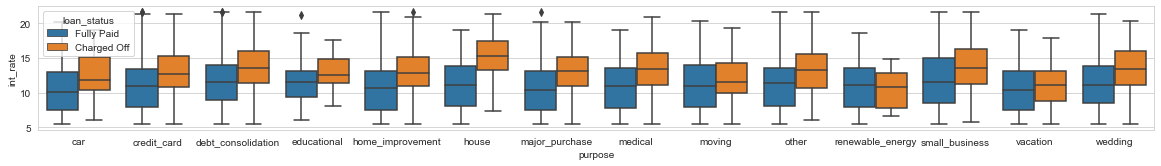

In [102]:
#Purpose vs Interest Rate
df_purpose_interest_rate = df.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()

plt.suptitle('Purpose vs Interest Rate')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= df, order=df_purpose_loan_amount[df_purpose_loan_amount.loan_status == 'Charged Off'].purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= df, order=df_purpose_loan_amount[df_purpose_loan_amount.loan_status == 'Charged Off'].purpose)
plt.show()

Observations: Houses has highest chances of getting defaulters if interest rate is high


In [103]:
def Bivariate_Categorical (*, data=df, x, y):
    plt.figure(figsize=(20,5))
    pt = pd.pivot_table(data=data, values='loan_status_flag', index=y, columns=x)
    sns.heatmap(pt,  cmap='YlGnBu')
    plt.show()

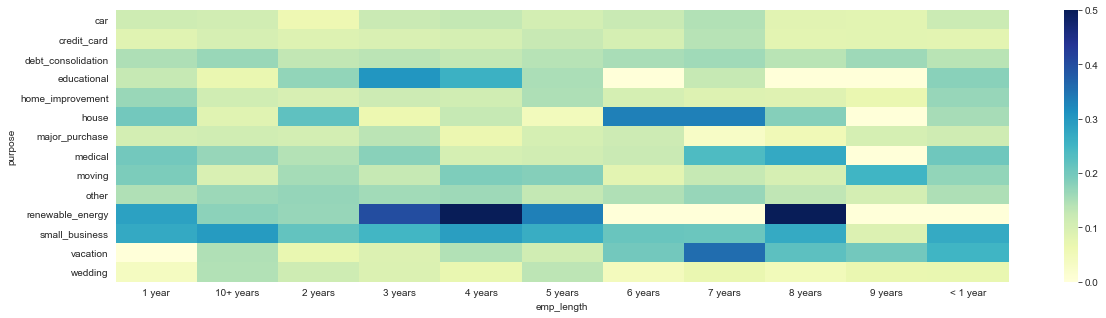

In [104]:
Bivariate_Categorical(x='emp_length', y='purpose')

Observation: 
    -People with medium workexperience taking House loans which  are more prone to be defaulters

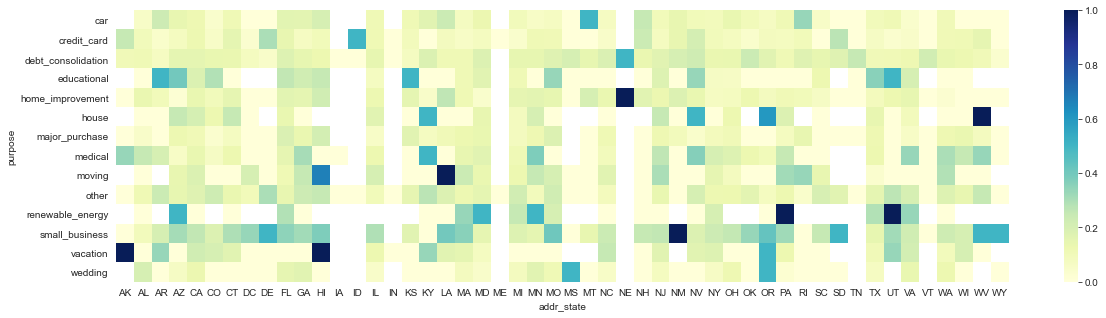

In [105]:
Bivariate_Categorical(x='addr_state', y='purpose')

Observation: vacation loans in AK, HI
             education loans in AR, KS, UT 
            small business loans in DE, NM, WV, wY 
            •wedding loans in MS, OR all these combition of loans are risky